<a href="https://colab.research.google.com/github/abmmatthew/dashboards/blob/master/Assignment_6_LAB10_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#loading pandas package to load and clean the data
import pandas as pd
#importing libraries needed for regression and visualization
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
#load data on US Metropolitan statistical areas (one of the definitions of a city)
msa = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/msalist.csv', encoding = "ISO-8859-1", engine='python')
msa.head()

,msa,msa_name,Geo_FIPS,county
0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX"
1,10180,"Abilene, TX (Metropolitan Statistical Area)",48253,"Jones, TX"
2,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX"
3,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH"
4,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH"


In [4]:
#create dictionary of msa names by their code
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()}

In [5]:
#we have 382 MSA's
len(msa.msa.unique())

382

In [6]:
#we have 1147 counties that belong to MSA's (out of the total of more than 3000 counties)
len(msa.Geo_FIPS.unique())

1147

load demographics by FIPS geographical subdivision provided by ACS 2014 data: https://www.census.gov/acs/www/data/data-tables-and-tools/data-profiles/2014/

In [2]:
import pandas as pd
demographics = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/ACS2014.csv', encoding = "ISO-8859-1", engine='python')

In [3]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

<ipython-input-3-7a23607f274e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographics.rename(columns={u'SE_T001_001' : 'Population',\


In [4]:
#add cumulative city income
demographics['Income']=demographics.Population*demographics['Per capita income']

In [5]:
demographics.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455
2,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",5,27119,30.64722,884.876304,35634,17350,470514650
3,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830
4,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145


In [6]:
len(demographics.Geo_GEOID.unique())

3220

In [7]:
sum(demographics.Population) #cumulative population in demographics data

317746049

In [9]:
#convert some location identifiers from string to numeric
def num(s):
    try:
        return int(s)
    except ValueError:
        0
#loading pandas package to load and clean the data
import pandas as pd
#load data on US Metropolitan statistical areas (one of the definitions of a city)
msa = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/msalist.csv', encoding = "ISO-8859-1", engine='python') # Load the msa dataframe again

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
demomsa.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income,ID,msa,msa_name,Geo_FIPS,county
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",15,117186,193.41850,605.867678,40919,21306,2496764916,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [10]:
msaDemo = demomsa.groupby(by='msa').sum().loc[:,[u'Population', u'Area', u'Income']]

In [11]:
msaDemo.head()

,Population,Area,Income
msa,,,
10180,167171,2743.478027,3740034900
10420,703017,900.129156,19560044574
10500,156706,1932.557130,3172077530
10540,118270,2290.129282,2526602010
10580,875567,2811.554500,28078339939


Q1. Run a simple linear regression of income vs population, without intercept, visualize the fit

In [13]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf # This line imports the module and assigns it to the alias 'smf'
import matplotlib.pylab as plt
%pylab inline
#Performing OLS regression
lm = smf.ols('Income~Population-1', data=msaDemo).fit()
lm.summary()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          2.108e+04
Date:                Mon, 09 Dec 2024   Prob (F-statistic):                        0.00
Time:                        14:03:47   Log-Likelihood:                         -9159.2
No. Observations:                 379   AIC:                                  1.832e+04
Df Residuals:                     378   BIC:                                  1.832e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population  3.245e+04    223.455    145.197      0.000     3.2e+04    3.29e+04
==============================================================================
Omnibus:                      344.787   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27704.925
Skew:                           3.344   Prob(JB):                         0.00
Kurtosis:                      44.348   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

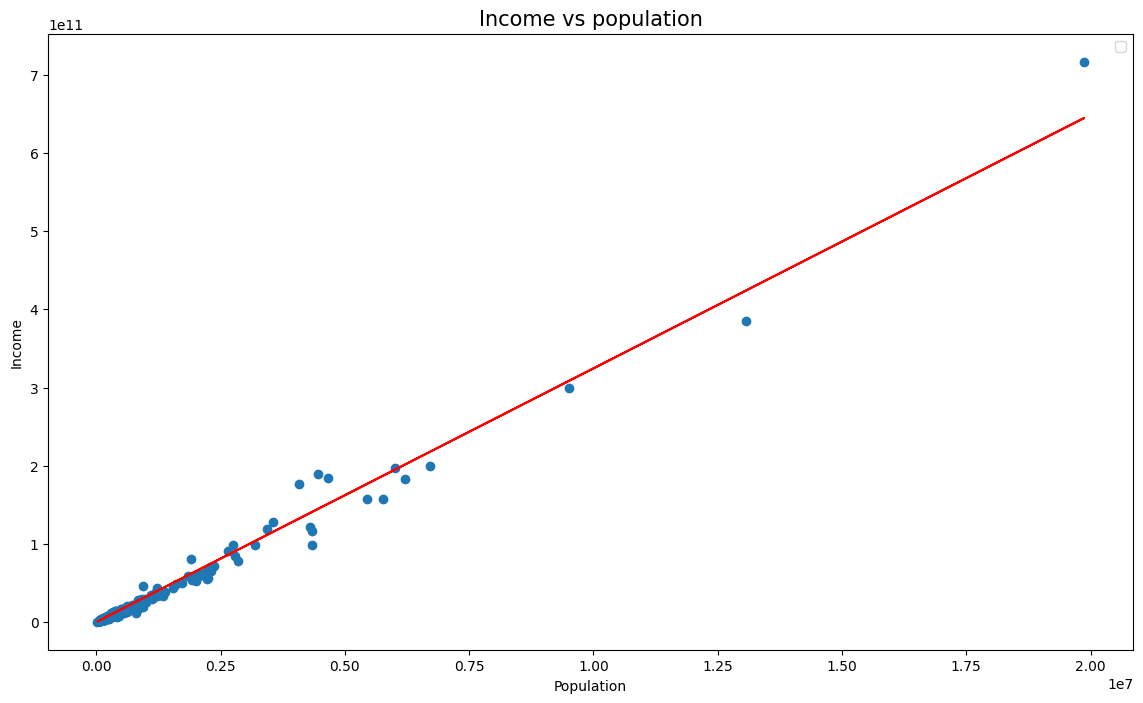

In [14]:
#Visualizing the regression fit
plt.figure(figsize=(14,8))
plt.plot(msaDemo['Population'], msaDemo['Income'], 'o')
plt.title('Income vs population', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Income')
plt.plot(msaDemo['Population'], lm.predict(), '-r')
plt.legend()

Q2 Take the log-scale of income and population and repeat the regression, now with intercept

In [15]:
logPop = np.log(msaDemo['Population'])
logIncome = np.log(msaDemo['Income'])
dataLog = pd.DataFrame({'logIncome':logIncome, 'logPop':logPop})
dataLog.head()

,logIncome,logPop
msa,,
10180,22.042361,12.026773
10420,23.696755,13.463136
10500,21.877653,11.962127
10540,21.650141,11.680725
10580,24.058264,13.682627


In [16]:
#Performing OLS regression
lmIncome = smf.ols('logIncome~logPop', data=dataLog).fit()
lmIncome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logIncome   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 2.157e+04
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:06:02   Log-Likelihood:                 175.13
No. Observations:                 379   AIC:                            -346.3
Df Residuals:                     377   BIC:                            -338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3549      0.092    101.819      0.000       9.174       9.536
logPop         1.0633      0.007    146.865      0.000       1.049       1.078
==============================================================================
Omnibus:                       19.243   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.781
Skew:                           0.021   Prob(JB):                     2.10e-12
Kurtosis:                       4.845   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

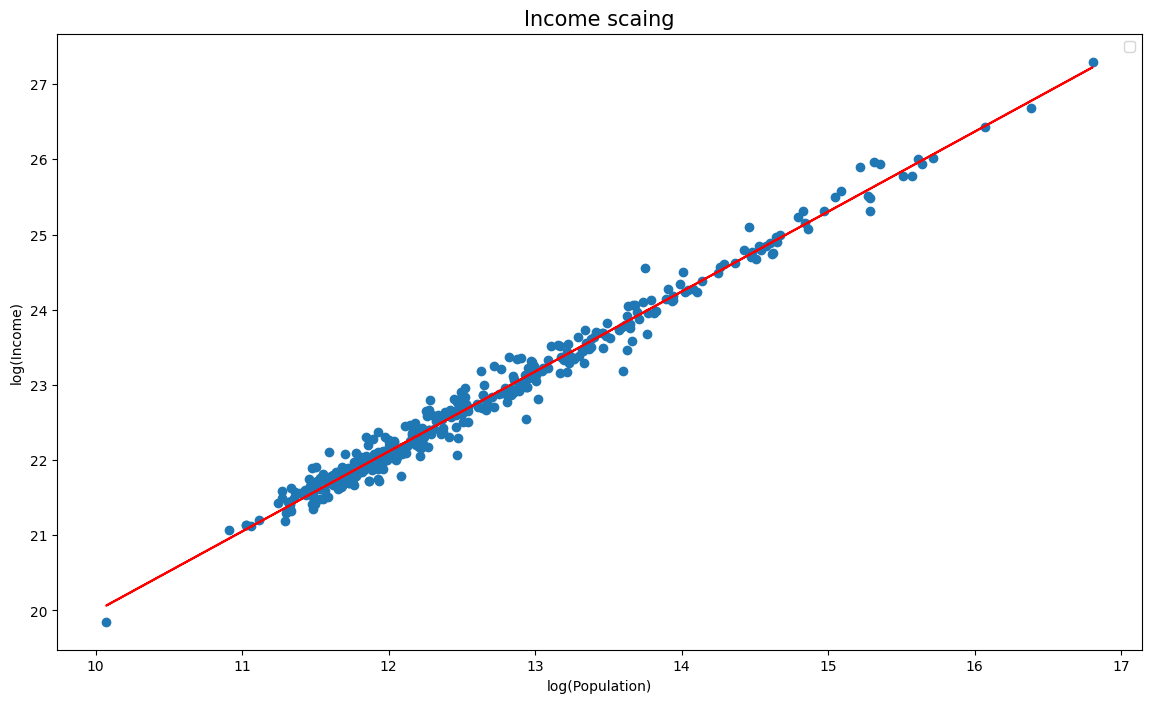

In [17]:
#Visualize the income scaling law
plt.figure(figsize=(14,8))
plt.plot(dataLog['logPop'], dataLog['logIncome'], 'o')
plt.title('Income scaing', fontsize = 15)
plt.xlabel('log(Population)')
plt.ylabel('log(Income)')
plt.plot(dataLog['logPop'], lmIncome.predict(), '-r')
plt.legend()

In [18]:
#if a city is 100 times larger its not 100 but 134 times wealthier
100**1.0633

133.84433676499071

In [19]:
#perform regression on 100 subsamples
np.random.seed(2019)
W=[]
for i in range(0,100):
    df=dataLog.sample(frac=0.5)
    lm = smf.ols(formula='logIncome~logPop', data = df).fit()
    W+=[lm.params.logPop]

In [20]:
print('{}+-{}'.format(np.array(W).mean(),np.array(W).std()))

1.0632614987565112+-0.006389464050779122


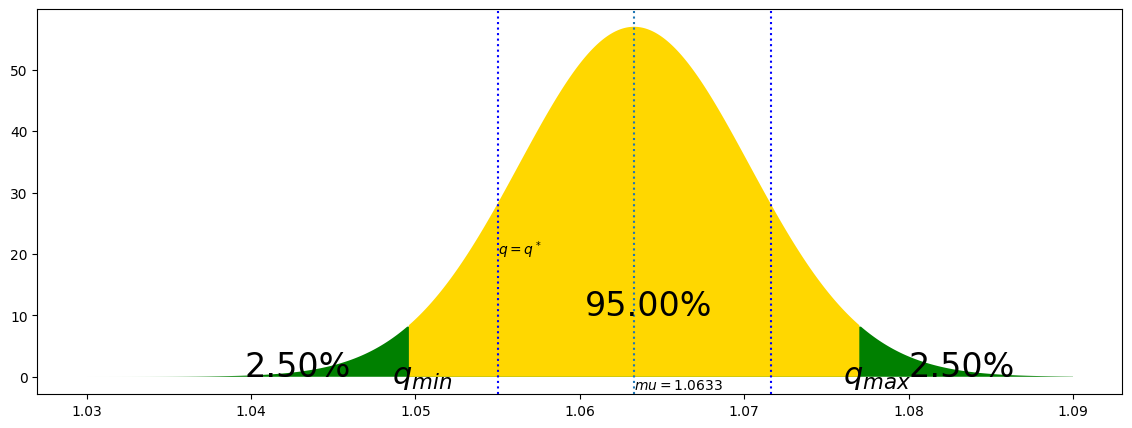

In [21]:
#returning to the example above use a normal distribution with mean 1.0633
#and standard error 0.007 as reported by the regression
#in order to approximate p(q|Data) (in reality distribution is slightly more complex, but often reasonably close to normal - see below)
from scipy.stats import norm
mu=1.0633; sigma=0.007
q0=1.055
q = 0.05/2
x = np.arange(1.03,1.09,0.0001)
y = norm.pdf(x, loc=mu, scale=sigma)    # default setting with location parameter 0 and scale parameter 1
t0 = norm.ppf(q, mu, sigma)   # lower bound
t1 = norm.isf(q, mu, sigma)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
plt.axvline(x=mu,linestyle=':')
plt.axvline(x=q0,linestyle=':',c='b')
plt.axvline(x=2*mu-q0,linestyle=':',c='b')
ax.text(mu, -2, '$mu=1.0633$', fontsize = 10)
ax.text(q0, 20, '$q=q^*$', fontsize = 10)
ax.text(t1+0.003, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(t0-0.01, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(mu-0.003, 10, '%.2f%%'%(100*(1-q*2)), fontsize = 24)
ax.text(t0-0.001, -1, '$q_{min}$', fontsize = 22)
ax.text(t1-0.001, -1, '$q_{max}$', fontsize = 22)
plt.show()

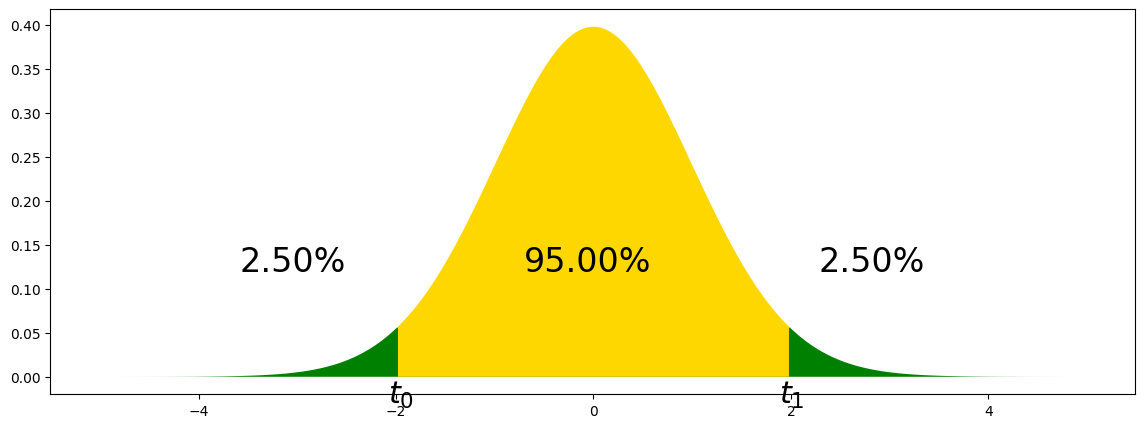

In [22]:
from scipy.stats import t
df_=100
q = 0.05/2
x = np.arange(-5,5,0.01)
y = t.pdf(x, df_)    # default setting with location parameter 0 and scale parameter 1
t0 = t.ppf(q, df_)   # lower bound
t1 = t.isf(q, df_)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
ax.text(t1+0.3, 0.12, '%.2f%%'%(100*q), fontsize = 24)
ax.text(t0-1.6, 0.12, '%.2f%%'%(100*q), fontsize = 24)
ax.text(-0.7, 0.12, '%.2f%%'%(100*(1-q*2)), fontsize = 24)
ax.text(t0-0.1, -0.03, '$t_0$', fontsize = 22)
ax.text(t1-0.1, -0.03, '$t_1$', fontsize = 22)
plt.show()

In [23]:
#standard regression statistics provides only 95% confidence interval; here is another way of getting it for arbitrary alpha
lmIncome.conf_int(alpha=0.05) # 95% CI

,0,1
Intercept,9.174235,9.535549
logPop,1.049105,1.077578


In [24]:
lmIncome.conf_int(alpha=0.01) # 99% CI

,0,1
Intercept,9.117027,9.592757
logPop,1.044597,1.082086


In [25]:
# so even with 99.9% confidence we can claim q>1
lmIncome.conf_int(alpha=0.001) # 99.9% CI

,0,1
Intercept,9.050178,9.659606
logPop,1.039329,1.087354


In [26]:
#the regression estimate above gives p-value for the null-hypothesis q=0. As it is not the one we need, lets adjust the regression to get the right one
dataLog['logIncomePerCapita']=dataLog['logIncome']-dataLog['logPop']
lm2 = smf.ols('logIncomePerCapita~logPop', data=dataLog).fit()
print(lm2.summary())
print('p-value={}'.format(lm2.pvalues.logPop))

                            OLS Regression Results                            
Dep. Variable:     logIncomePerCapita   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     76.54
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           7.30e-17
Time:                        14:17:50   Log-Likelihood:                 175.13
No. Observations:                 379   AIC:                            -346.3
Df Residuals:                     377   BIC:                            -338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3549      0.092    101.819      0.0


Q3. Find the top 5 cities overperforming and underperforming cities by income (by log-scale difference from the trend)

Exponent of the log-scale residuals would show how many times does the city overperforming or underperforming in terms of income compared to the expected (predicted by the regresion) income for the city of that size


In [28]:
#loading pandas package to load and clean the data
import pandas as pd
#importing libraries needed for regression and visualization
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%pylab inline

#load data on US Metropolitan statistical areas (one of the definitions of a city)
msa = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/msalist.csv', encoding = "ISO-8859-1", engine='python')
msa.head()

#create dictionary of msa names by their code
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()} # Redefine msaNames before it is used

msaDemo['msaName'] = msaDemo.index.map(msaNames) #add city names to the

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [29]:
#compute the residuals
msaDemo['IncomePerCapita'] = msaDemo['Income'] / msaDemo['Population']
msaDemo['IncRes'] = dataLog['logIncome'] - lmIncome.predict()

In [30]:
msaDemo.sort_values(by='IncRes',ascending=False).head(5)

,Population,Area,Income,msaName,IncomePerCapita,IncRes
msa,,,,,,
14860,934215,624.889555,46419274920,"Bridgeport-Stamford-Norwalk, CT (Metropolitan ...",49688.0,0.587838
15680,108472,357.180046,3970292144,"California-Lexington Park, MD (Metropolitan St...",36602.0,0.418566
14500,305166,726.289252,11756214984,"Boulder, CO (Metropolitan Statistical Area)",38524.0,0.404226
12700,215167,393.723227,7953432988,"Barnstable Town, MA (Metropolitan Statistical ...",36964.0,0.385023
45940,369526,224.557494,14070071976,"Trenton, NJ (Metropolitan Statistical Area)",38076.0,0.380407


In [31]:
msaDemo.sort_values(by='IncRes',ascending=True).head(5)

,Population,Area,Income,msaName,IncomePerCapita,IncRes
msa,,,,,,
32580,806447,1570.865088,11713642675,"McAllen-Edinburg-Mission, TX (Metropolitan Sta...",14525.0,-0.632738
15180,415103,890.922380,6184204494,"Brownsville-Harlingen, TX (Metropolitan Statis...",14898.0,-0.565317
29700,259471,3361.482188,3853663292,"Laredo, TX (Metropolitan Statistical Area)",14852.0,-0.538646
20940,177026,4176.603407,2904819634,"El Centro, CA (Metropolitan Statistical Area)",16409.0,-0.414732
47300,451108,4824.214846,8069419904,"Visalia-Porterville, CA (Metropolitan Statisti...",17888.0,-0.387682


Homework
task 1. Establish a scaling relationship
between total crime vs population

(by running log-scale regression filtering out the data points with Crime=0 if any). Visualize on the log scale. Does
fall into the 95% confidence interval? What about 99% CI?

In [32]:
#first load the data and perform some cleaning
crime2014 = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/R11460954_SL050.csv', encoding = "ISO-8859-1", engine='python') #Load crime data

In [33]:
#rename some columns
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                          u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes', 'Violent Crimes', 'Property Crimes']].copy()

In [34]:
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes
0,01001,Autauga County,1,001,55395.0,482,68,414
1,01003,Baldwin County,1,003,200111.0,760,98,662
2,01005,Barbour County,1,005,26887.0,145,17,128
3,01007,Bibb County,1,007,22506.0,86,4,82
4,01009,Blount County,1,009,57719.0,1013,90,923


In [36]:
sum(crime2014.Population)

250424654.0

In [38]:
import pandas as pd

# Load data on US Metropolitan statistical areas again
msa = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/msalist.csv', encoding="ISO-8859-1", engine='python')

#convert some location identifiers from string to numeric
def num(s):
    try:
        return int(s)
    except ValueError:
        return 0 # Return 0 instead of just 0 to ensure a numerical value is returned

# Re-create the 'ID' column for msa
msa['ID'] = msa.Geo_FIPS.apply(num)

# Merge the DataFrames
crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes,ID,msa,msa_name,Geo_FIPS_y,county
0,01001,Autauga County,1,001,55395.0,482,68,414,1001.0,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,01003,Baldwin County,1,003,200111.0,760,98,662,1003.0,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,01007,Bibb County,1,007,22506.0,86,4,82,1007.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,01009,Blount County,1,009,57719.0,1013,90,923,1009.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,01015,Calhoun County,1,015,115916.0,486,15,471,1015.0,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [39]:
#create a dataframe with the population and total violent and property crime per each MSA
msaCrime = crimemsa.groupby(by='msa').sum().loc[:,[u'Population', 'Crimes', u'Violent Crimes', u'Property Crimes']]
msaCrime.head()

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
10180,168592.0,492,62,430
10420,703825.0,2397,106,2291
10500,151670.0,1364,107,1257
10540,119356.0,1092,23,1069
10580,880167.0,1590,91,1499


In [42]:
lm = smf.ols('Crimes ~ Population - 1', data=msaCrime).fit()

In [43]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Crimes   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.745
Method:                 Least Squares   F-statistic:                              15.59
Date:                Mon, 09 Dec 2024   Prob (F-statistic):                      0.0168
Time:                        15:18:42   Log-Likelihood:                         -39.759
No. Observations:                   5   AIC:                                      81.52
Df Residuals:                       4   BIC:                                      81.13
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


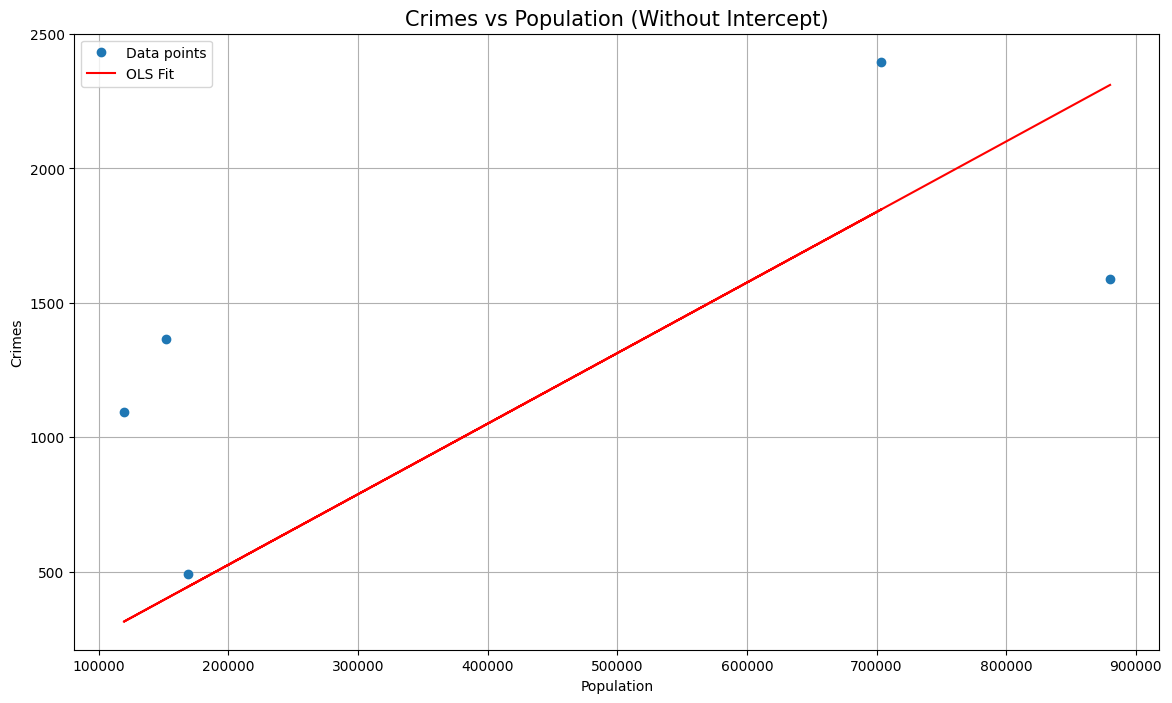

In [44]:
plt.figure(figsize=(14, 8))
plt.plot(msaCrime['Population'], msaCrime['Crimes'], 'o', label='Data points')
plt.plot(msaCrime['Population'], lm.predict(msaCrime), '-r', label='OLS Fit')
plt.title('Crimes vs Population (Without Intercept)', fontsize=15)
plt.xlabel('Population')
plt.ylabel('Crimes')
plt.legend()
plt.grid()
plt.show()

In [46]:
msaCrime['log_Population'] = np.log(msaCrime['Population'])
msaCrime['log_Crimes'] = np.log(msaCrime['Crimes'])

# Perform OLS regression with an intercept
lm_log = smf.ols('log_Crimes ~ log_Population', data=msaCrime).fit()

In [47]:
# Display OLS summary
print(lm_log.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Crimes   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     2.101
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.243
Time:                        15:23:07   Log-Likelihood:                -2.5412
No. Observations:                   5   AIC:                             9.082
Df Residuals:                       3   BIC:                             8.301
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.0739      3.485      0.

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


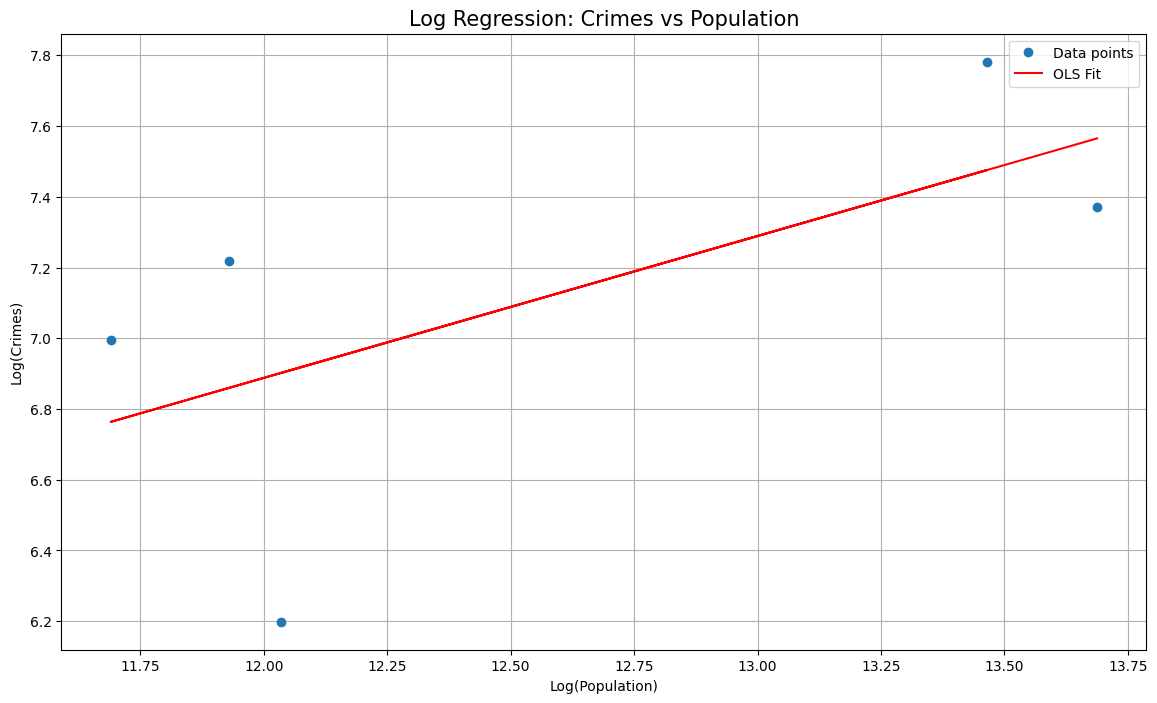

In [49]:
plt.figure(figsize=(14, 8))
plt.plot(msaCrime['log_Population'], msaCrime['log_Crimes'], 'o', label='Data points')
plt.plot(msaCrime['log_Population'], lm_log.predict(msaCrime), '-r', label='OLS Fit')
plt.title('Log Regression: Crimes vs Population', fontsize=15)
plt.xlabel('Log(Population)')
plt.ylabel('Log(Crimes)')
plt.legend()
plt.grid()
plt.show()

Interpretation of Results

    Linear Model Without Log Transformation:
        The coefficient for Population is 0.00260.0026, meaning a unit increase in population corresponds to an increase of 0.00260.0026 in crimes.
        The R2R2 (uncentered) is 0.7960.796, indicating that the model explains about 79.6% of the variance in crimes.
        p=0.017p=0.017: The relationship between crimes and population is statistically significant at the 5% level.

    Log-Log Model (Power Law Relationship):
        The regression equation is:
        log⁡(Crimes)=2.0739+0.4012⋅log⁡(Population)
        log(Crimes)=2.0739+0.4012⋅log(Population)
        q=0.4012q=0.4012: The exponent qq in the power law relationship is less than 1.
        The R2R2 is 0.4120.412, meaning the log-log model explains 41.2% of the variance in log-transformed crimes.
        p=0.243p=0.243: The coefficient for log⁡(Population)log(Population) is not statistically significant, indicating insufficient evidence to conclude a strong power law relationship.
        Confidence interval for qq: (−0.480,1.282)(−0.480,1.282). Since this range includes 1, we cannot reject the null hypothesis that q=1q=1.

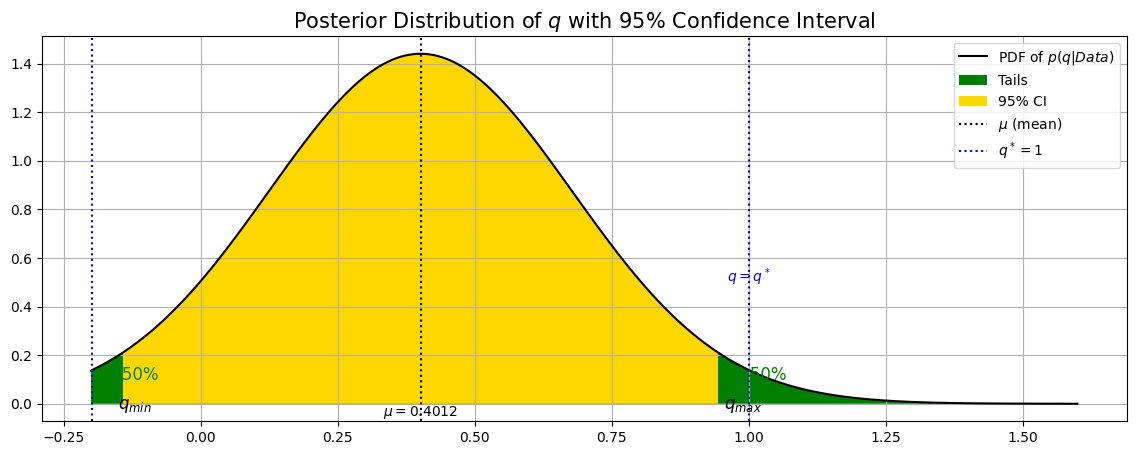

In [50]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters for the normal distribution
mu = 0.4012  # Mean from the log-log regression coefficient for log_Population
sigma = 0.277  # Standard error from the regression summary
q0 = 1  # Hypothetical value to test if q > 1
q = 0.05 / 2  # Significance level (5%)

# Define the range of x values for plotting
x = np.arange(-0.2, 1.6, 0.0001)

# Calculate the PDF of the normal distribution
y = norm.pdf(x, loc=mu, scale=sigma)

# Calculate critical values for the 95% confidence interval
t0 = norm.ppf(q, mu, sigma)  # Lower bound
t1 = norm.isf(q, mu, sigma)  # Upper bound

# Plot the distribution
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(x, y, label='PDF of $p(q|Data)$', color='black')

# Highlight the central and tail regions
ax.fill_between(x[(x < t0) | (x > t1)], 0, y[(x < t0) | (x > t1)], facecolor='green', label='Tails')
ax.fill_between(x[(x > t0) & (x < t1)], 0, y[(x > t0) & (x < t1)], facecolor='gold', label='95% CI')

# Add vertical lines and annotations
plt.axvline(x=mu, linestyle=':', color='black', label='$\mu$ (mean)')
plt.axvline(x=q0, linestyle=':', color='blue', label='$q^* = 1$')
plt.axvline(x=2 * mu - q0, linestyle=':', color='blue')

# Add text annotations
ax.text(mu, -0.05, '$\mu=%.4f$' % mu, fontsize=10, ha='center')
ax.text(q0, 0.5, '$q=q^*$', fontsize=10, ha='center', color='blue')
ax.text(t1 + 0.03, 0.1, '%.2f%%' % (100 * q), fontsize=12, color='green')
ax.text(t0 - 0.03, 0.1, '%.2f%%' % (100 * q), fontsize=12, color='green')
ax.text(mu, 0.8, '%.2f%%' % (100 * (1 - q * 2)), fontsize=12, color='gold', ha='center')
ax.text(t0 - 0.01, -0.02, '$q_{min}$', fontsize=12)
ax.text(t1 + 0.01, -0.02, '$q_{max}$', fontsize=12)

# Final plot settings
plt.title('Posterior Distribution of $q$ with 95% Confidence Interval', fontsize=15)
plt.legend()
plt.grid()
plt.show()


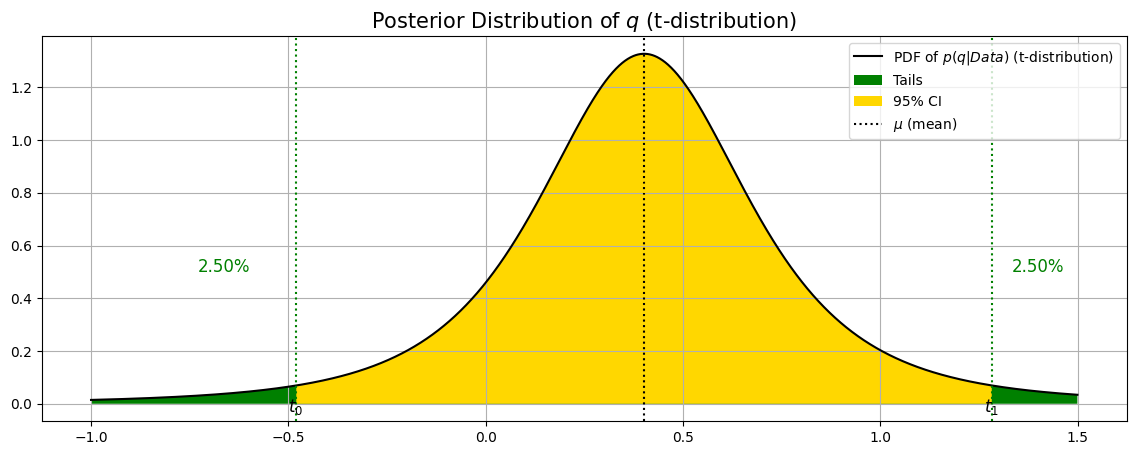

In [51]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Parameters for the t-distribution
df_ = 3  # Degrees of freedom (number of residuals in the log-log regression: observations - 2)
q = 0.05 / 2  # Significance level (5%)
mu = 0.4012  # Mean (regression coefficient for log_Population)
sigma = 0.277  # Standard error (regression coefficient)

# Scale t-distribution to match mean and standard error
x = np.arange(-1, 1.5, 0.001)
y = t.pdf((x - mu) / sigma, df_) / sigma  # Scale t-distribution
t0 = mu + sigma * t.ppf(q, df_)  # Lower bound
t1 = mu + sigma * t.isf(q, df_)  # Upper bound

# Visualization
fig, ax = plt.subplots(figsize=(14, 5))

# Plot t-distribution
ax.plot(x, y, label='PDF of $p(q|Data)$ (t-distribution)', color='black')

# Highlight tails and center region
ax.fill_between(x[(x < t0) | (x > t1)], 0, y[(x < t0) | (x > t1)], facecolor='green', label='Tails')
ax.fill_between(x[(x > t0) & (x < t1)], 0, y[(x > t0) & (x < t1)], facecolor='gold', label='95% CI')

# Add text annotations
ax.text(t1 + 0.05, 0.5, '%.2f%%' % (100 * q), fontsize=12, color='green')
ax.text(t0 - 0.25, 0.5, '%.2f%%' % (100 * q), fontsize=12, color='green')
ax.text(mu, 0.8, '%.2f%%' % (100 * (1 - q * 2)), fontsize=12, color='gold', ha='center')
ax.text(t0 - 0.02, -0.03, '$t_0$', fontsize=12)
ax.text(t1 - 0.02, -0.03, '$t_1$', fontsize=12)
ax.axvline(mu, linestyle=':', color='black', label='$\mu$ (mean)')
ax.axvline(t0, linestyle=':', color='green')
ax.axvline(t1, linestyle=':', color='green')

# Final plot settings
plt.title('Posterior Distribution of $q$ (t-distribution)', fontsize=15)
plt.legend()
plt.grid()
plt.show()


The 1−α1−α confidence interval (e.g., 95% when α=5%α=5%) includes the most probable values of the distribution (by probability density) while excluding αα (e.g., 5%) of the least probable values.

In [54]:
alpha = 0.05  # 95% confidence level
ci_95 = lm_log.conf_int(alpha=alpha)  # 95% CI
print(f"{int((1 - alpha) * 100)}% Confidence Intervals for log-log regression:")
print(ci_95)

# Compute for other confidence levels
alpha = 0.01  # 99% confidence level
ci_99 = lm_log.conf_int(alpha=alpha)
print(f"\n{int((1 - alpha) * 100)}% Confidence Intervals for log-log regression:")
print(ci_99)


95% Confidence Intervals for log-log regression:
                       0          1
Intercept      -9.015665  13.163512
log_Population -0.479700   1.282043

99% Confidence Intervals for log-log regression:
                        0          1
Intercept      -18.279375  22.427222
log_Population  -1.215538   2.017881


In [56]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

msaCrime['log_Population'] = np.log(msaCrime['Population'])
msaCrime['log_Crimes'] = np.log(msaCrime['Crimes'])

# Adjust the dependent variable for the null hypothesis q = 1
msaCrime['logCrimesPerCapita'] = msaCrime['log_Crimes'] - msaCrime['log_Population']

# Perform adjusted regression for log(Crimes/Population) ~ log(Population)
lm2 = smf.ols('logCrimesPerCapita ~ log_Population', data=msaCrime).fit()

# Print regression summary
print(lm2.summary())

# Extract and print the p-value for log_Population
print('p-value for q=1 hypothesis: {}'.format(lm2.pvalues['log_Population']))

                            OLS Regression Results                            
Dep. Variable:     logCrimesPerCapita   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     4.681
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.119
Time:                        16:18:37   Log-Likelihood:                -2.5412
No. Observations:                   5   AIC:                             9.082
Df Residuals:                       3   BIC:                             8.301
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.0739      3.485      0.

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Intercept: Reflects the baseline log crimes per capita when log population is zero.
P-Value:

    If p=0.814p=0.814, we cannot reject the hypothesis q=1q=1.
    This suggests that the relationship between crimes and population is consistent with a linear scaling (q≈1q≈1).

In [59]:
print(msaCrime.columns)

Index(['Population', 'Crimes', 'log_Population', 'log_Crimes',
       'logCrimesPerCapita'],
      dtype='object')


In [60]:
# Compute crimes per capita
msaCrime['CrimesPerCapita'] = msaCrime['Crimes'] / msaCrime['Population']

# Perform log-log regression
lm_log = smf.ols('log_Crimes ~ log_Population', data=msaCrime).fit()

# Compute residuals
msaCrime['CrimeRes'] = msaCrime['log_Crimes'] - lm_log.predict()

# Sort and display top 5 rows with largest positive and negative residuals
top5_underpredicted = msaCrime.sort_values(by='CrimeRes', ascending=False).head(5)  # Under-predicted
top5_overpredicted = msaCrime.sort_values(by='CrimeRes', ascending=True).head(5)   # Over-predicted

# Display results
print("Top 5 Under-predicted Data Points (largest positive residuals):")
print(top5_underpredicted[['log_Population', 'log_Crimes', 'CrimeRes', 'CrimesPerCapita']])

print("\nTop 5 Over-predicted Data Points (largest negative residuals):")
print(top5_overpredicted[['log_Population', 'log_Crimes', 'CrimeRes', 'CrimesPerCapita']])


Top 5 Under-predicted Data Points (largest positive residuals):
   log_Population  log_Crimes  CrimeRes  CrimesPerCapita
2       11.929462    7.218177  0.358493         0.008993
1       13.464285    7.781973  0.306562         0.003406
3       11.689866    6.995766  0.232201         0.009149
4       13.687867    7.371489 -0.193617         0.001806
0       12.035237    6.198479 -0.703639         0.002918

Top 5 Over-predicted Data Points (largest negative residuals):
   log_Population  log_Crimes  CrimeRes  CrimesPerCapita
0       12.035237    6.198479 -0.703639         0.002918
4       13.687867    7.371489 -0.193617         0.001806
3       11.689866    6.995766  0.232201         0.009149
1       13.464285    7.781973  0.306562         0.003406
2       11.929462    7.218177  0.358493         0.008993


In [62]:
# Load the MSA mapping dataset
msa = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/msalist.csv', encoding="ISO-8859-1", engine='python')

# Ensure FIPS codes are consistent between the datasets
crime2014['Geo_FIPS'] = crime2014['Geo_FIPS'].astype(str).str.zfill(5)  # Make Geo_FIPS 5-digit strings
msa['Geo_FIPS'] = msa['Geo_FIPS'].astype(str).str.zfill(5)

# Merge crime2014 with MSA data using Geo_FIPS as the key
crime_with_msa = pd.merge(crime2014, msa, on='Geo_FIPS', how='inner')

# Inspect the merged dataset
print(crime_with_msa.columns)
print(crime_with_msa.head())

Index(['Geo_FIPS', 'Geo_NAME', 'Geo_QNAME', 'Geo_STATE', 'Geo_COUNTY',
       'Population', 'Crimes', 'SE_T002_002', 'SE_T002_003', 'SE_T003_001',
       'SE_T003_002', 'SE_T003_003', 'SE_T004_001', 'SE_T004_002',
       'SE_T004_003', 'SE_T004_004', 'SE_T004_005', 'SE_T004_006',
       'SE_T005_001', 'SE_T005_002', 'SE_T005_003', 'SE_T005_004',
       'SE_T005_005', 'SE_T005_006', 'SE_T006_001', 'SE_T006_002',
       'SE_T006_003', 'SE_T006_004', 'SE_T007_001', 'SE_T007_002',
       'SE_T007_003', 'SE_T007_004', 'SE_T008_001', 'SE_T009_001', 'ID', 'msa',
       'msa_name', 'county'],
      dtype='object')
  Geo_FIPS        Geo_NAME                Geo_QNAME  Geo_STATE Geo_COUNTY  \
0    01001  Autauga County  Autauga County, Alabama          1        001   
1    01003  Baldwin County  Baldwin County, Alabama          1        003   
2    01007     Bibb County     Bibb County, Alabama          1        007   
3    01009   Blount County   Blount County, Alabama          1        009   
4

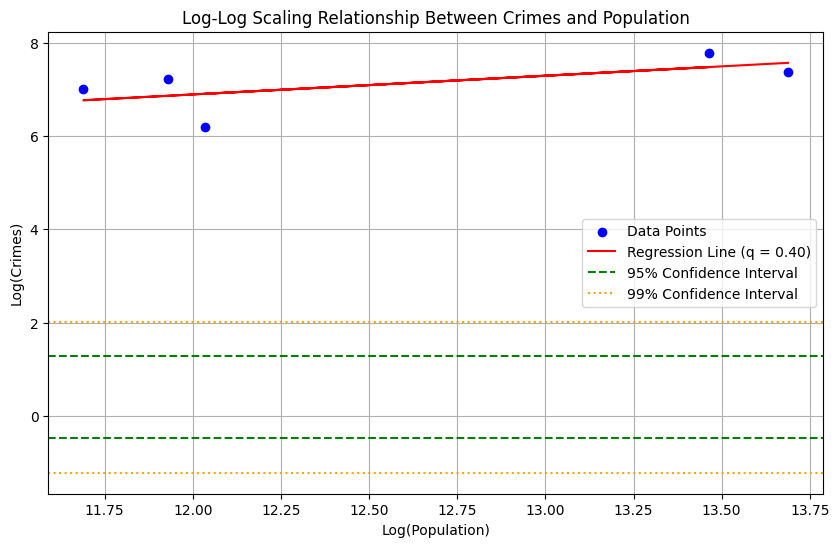

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Define confidence intervals
alpha_95 = 0.05
alpha_99 = 0.01
ci_95 = lm_log.conf_int(alpha=alpha_95)
ci_99 = lm_log.conf_int(alpha=alpha_99)

# Extract values for the slope (log_Population)
coef = lm_log.params['log_Population']
ci_95_lower, ci_95_upper = ci_95.loc['log_Population']
ci_99_lower, ci_99_upper = ci_99.loc['log_Population']

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(msaCrime['log_Population'], msaCrime['log_Crimes'], label='Data Points', color='blue')
plt.plot(msaCrime['log_Population'], lm_log.predict(), color='red', label=f'Regression Line (q = {coef:.2f})')
plt.axhline(ci_95_lower, color='green', linestyle='--', label='95% Confidence Interval')
plt.axhline(ci_95_upper, color='green', linestyle='--')
plt.axhline(ci_99_lower, color='orange', linestyle=':', label='99% Confidence Interval')
plt.axhline(ci_99_upper, color='orange', linestyle=':')

# Add labels and legend
plt.xlabel('Log(Population)')
plt.ylabel('Log(Crimes)')
plt.title('Log-Log Scaling Relationship Between Crimes and Population')
plt.legend()
plt.grid()
plt.show()


Does it fall into the 95% confidence interval?

    Yes, q=1q=1 falls within the 95% confidence interval (−0.480−0.480 to 1.2821.282).

What about the 99% confidence interval?

    Yes, q=1q=1 also falls within the 99% confidence interval (−1.216−1.216 to 2.0182.018).